# Deep Research with GPT-OSS on Amazon Bedrock

## Building Intelligent Multi-Agent Research Systems

This notebook demonstrates how to build a sophisticated AI research system using **OpenAI GPT-OSS-120B** on Amazon Bedrock. GPT-OSS delivers exceptional performance for research use cases through its combination of:

🚀 **High Speed** - Fast inference for real-time research workflows  
💰 **Low Cost** - Cost-effective solution for extensive research tasks  
🧠 **Intelligent Reasoning** - Advanced analytical capabilities for complex research  

### What You'll Learn

- How to configure GPT-OSS on Amazon Bedrock for research workflows
- Building multi-agent systems with LangGraph
- Implementing intelligent research coordination and planning
- Monitoring and visualizing AI workflows with LangSmith
- Best practices for production research systems

### Prerequisites

- AWS Account with Bedrock access
- OpenAI GPT-OSS-120B model enabled in Bedrock
- Tavily API key for web search
- LangSmith account (optional, for monitoring)

---


## 🏗️ System Architecture

Our research system implements a sophisticated multi-agent architecture that mirrors how human research teams operate:

### Core Components

1. **Scoping Agent** - Clarifies research requirements and generates detailed briefs
2. **Supervisor Agent** - Coordinates research strategy and manages multiple research threads
3. **Research Agents** - Execute specialized research tasks with web search capabilities
4. **Report Generator** - Synthesizes findings into comprehensive final reports

### Architecture Flow

In [1]:
from mermaid import Mermaid
Mermaid("""
graph TD
    A[User Query] --> B[Scoping Agent]
    B --> C[Research Brief]
    C --> D[Supervisor Agent]
    D --> E[Research Agent 1]
    D --> F[Research Agent 2]
    D --> G[Research Agent N]
    E --> H[Research Findings]
    F --> H
    G --> H
    H --> I[Report Generator]
    I --> J[Final Research Report]
""")


### Why GPT-OSS is Perfect for Research

**🔍 Complex Reasoning**: Research requires deep analytical thinking, connecting disparate information, and drawing intelligent conclusions - areas where GPT-OSS excels.

**⚡ Speed & Efficiency**: Research workflows involve multiple LLM calls across agents. GPT-OSS's fast inference keeps the entire pipeline responsive.

**💡 Cost-Effective Scale**: Research tasks can involve hundreds of agent interactions. GPT-OSS provides enterprise-grade capabilities at a fraction of the cost.

**🎯 Specialized Performance**: The model's training optimizes it for research-style tasks like analysis, synthesis, and structured reasoning.

---

## 🚀 Quick Start Setup

### Step 1: Install Dependencies

First, let's install all required packages:


In [2]:
# Install required packages
%pip install -q langgraph langchain langchain-openai langchain-community langchain-tavily
%pip install -q langsmith python-dotenv rich boto3 tavily-python openai

print("✅ All dependencies installed successfully!")


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
✅ All dependencies installed successfully!


### Step 2: Environment Configuration

Configure your API keys and AWS settings. **Replace the placeholder values with your actual credentials:**


In [ ]:
import os
import sys
from pathlib import Path

# Add src directory to path for imports
sys.path.append(str(Path().absolute() / "src"))

# 🔑 CONFIGURATION - Replace with your actual credentials
# ================================================================

# Amazon Bedrock Configuration
os.environ["AWS_REGION"] = "us-west-2"  # Region where GPT-OSS is available
os.environ["OPENAI_API_KEY"] = "YOUR_BEDROCK_API_KEY_HERE"  # Your Bedrock API key

os.environ["OPENAI_BASE_URL"] = f"https://bedrock-runtime.{os.environ['AWS_REGION']}.amazonaws.com/openai/v1"

# Tavily API for web search
os.environ["TAVILY_API_KEY"] = "YOUR_TAVILY_API_KEY_HERE"  # Get from https://tavily.com

# LangSmith for monitoring (optional)
os.environ["LANGSMITH_API_KEY"] = "YOUR_LANGSMITH_API_KEY_HERE"  # Get from https://smith.langchain.com
os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_PROJECT"] = "gpt-oss-research-demo"

# ================================================================

print("🔧 Environment configured for GPT-OSS on Amazon Bedrock")
print(f"📍 Region: {os.environ['AWS_REGION']}")
print(f"🔍 Tavily Search: {'✅' if 'YOUR_' not in os.environ['TAVILY_API_KEY'] else '❌ Please set your API key'}")
print(f"📊 LangSmith Monitoring: {'✅' if 'YOUR_' not in os.environ['LANGSMITH_API_KEY'] else '⚠️ Optional - set for monitoring'}")


🔧 Environment configured for GPT-OSS on Amazon Bedrock
📍 Region: us-west-2
🔍 Tavily Search: ✅
📊 LangSmith Monitoring: ✅


### Step 3: Initialize GPT-OSS Model

Let's set up the GPT-OSS model through Amazon Bedrock and verify it's working:


In [4]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from langsmith.wrappers import wrap_openai
from openai import OpenAI

# GPT-OSS Model Configuration
MODEL_ID = "openai.gpt-oss-120b-1:0"

# Create the GPT-OSS model instance
gpt_oss_model = ChatOpenAI(
    model=MODEL_ID,
    temperature=0.1,  # Low temperature for consistent research output
    max_tokens=4000   # Generous token limit for detailed responses
)

# Wrap OpenAI client for LangSmith tracing
openai_client = wrap_openai(OpenAI())

print(f"🤖 GPT-OSS Model initialized: {MODEL_ID}")
print("🎯 Optimized for research with low temperature and high token limit")

# Test the model
try:
    test_response = gpt_oss_model.invoke([
        HumanMessage(content="Briefly explain why you're well-suited for research tasks.")
    ])
    print("\n✅ Model Test Successful!")
    print(f"📝 Response preview: {test_response.content}")
except Exception as e:
    print(f"❌ Model test failed: {e}")
    print("Please check your Bedrock configuration and API keys.")


🤖 GPT-OSS Model initialized: openai.gpt-oss-120b-1:0
🎯 Optimized for research with low temperature and high token limit

✅ Model Test Successful!
📝 Response preview: <reasoning>The user asks: "Briefly explain why you're well-suited for research tasks." They want a brief explanation. As ChatGPT, I can mention abilities: vast knowledge, ability to synthesize, speed, citation, etc. Provide concise answer.</reasoning>I’m well‑suited for research tasks because I combine a broad, up‑to‑date knowledge base with strong analytical and synthesis skills. I can quickly locate, evaluate, and summarize information from diverse sources, spot patterns, and generate clear, well‑structured reports. My ability to cite references, follow specific citation styles, and adapt to different domains (science, humanities, business, etc.) lets me produce reliable, concise outputs while saving you time and effort.


## 🎯 Complete Research Demo

### Running the Full Research System

For a complete demonstration of the GPT-OSS research system, we've created a comprehensive demo script that includes:

- ✅ Complete multi-agent research workflow
- ✅ Intelligent task coordination and parallel processing  
- ✅ Web search integration with Tavily
- ✅ Professional report generation
- ✅ LangSmith monitoring and visualization
- ✅ Production-ready error handling

### Execute the Demo

Run the complete research demo with this command:


In [5]:
# Build the Complete Research System
from typing import List, Dict, Any, Optional
from typing_extensions import TypedDict
from tavily import TavilyClient
from langchain_core.tools import tool
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import InMemorySaver
from langsmith import traceable
from datetime import datetime

print("🚀 Building GPT-OSS Multi-Agent Research System...")

# State definitions for our research workflow
class AgentState(TypedDict):
    """State for the research workflow"""
    messages: List[HumanMessage]
    clarification_needed: bool
    clarifying_question: Optional[str]
    research_brief: Optional[str]
    notes: List[str]
    final_report: Optional[str]

class AgentInputState(TypedDict):
    """Input state for starting research"""
    messages: List[HumanMessage]

def get_today_str() -> str:
    """Get today's date as a string"""
    return datetime.now().strftime("%Y-%m-%d")

# Initialize Tavily search tool (same as working implementation)
tavily_client = TavilyClient()

@tool
def research_tool(query: str) -> str:
    """Perform web search for research information"""
    try:
        result = tavily_client.search(
            query,
            max_results=5,
            include_raw_content=True,
            topic="general"
        )
        
        formatted_results = []
        for search_result in result.get('results', []):
            formatted_results.append(f"""
Title: {search_result.get('title', 'N/A')}
Content: {search_result.get('content', 'N/A')[:400]}...
URL: {search_result.get('url', 'N/A')}
""")
        
        return "\n".join(formatted_results) if formatted_results else "No search results found."
    except Exception as e:
        return f"Search failed: {str(e)}"



print("✅ Research tools configured")
print("✅ State management defined")
print("🔍 Tavily search integration ready")


🚀 Building GPT-OSS Multi-Agent Research System...
✅ Research tools configured
✅ State management defined
🔍 Tavily search integration ready


In [6]:
# Define Research Agent Functions
import asyncio

async def clarify_with_user(state: AgentState) -> Dict[str, Any]:
    """Determine if user clarification is needed"""
    conversation = "\n".join([msg.content for msg in state["messages"] if hasattr(msg, 'content')])
    
    clarification_prompt = f"""
Review this research request and determine if clarification is needed:

{conversation}

If the request is clear enough to proceed, respond with "No clarification needed."
If clarification is needed, ask ONE specific, helpful question.
"""
    
    response = await gpt_oss_model.ainvoke([HumanMessage(content=clarification_prompt)])
    
    if "No clarification needed" in response.content:
        return {"clarification_needed": False}
    else:
        return {
            "clarification_needed": True,
            "clarifying_question": response.content
        }

async def write_research_brief(state: AgentState) -> Dict[str, Any]:
    """Generate a detailed research brief"""
    conversation = "\n".join([msg.content for msg in state["messages"] if hasattr(msg, 'content')])
    
    brief_prompt = f"""
Create a comprehensive research brief based on this request:

{conversation}

Include:
1. Research Objective
2. Key Questions (3-5 specific questions)  
3. Scope & Focus
4. Success Criteria
5. Research Strategy
"""
    
    response = await gpt_oss_model.ainvoke([HumanMessage(content=brief_prompt)])
    return {"research_brief": response.content}

print("🧠 Research agents defined")
print("⚡ GPT-OSS will handle intelligent scoping and brief generation")


🧠 Research agents defined
⚡ GPT-OSS will handle intelligent scoping and brief generation


In [7]:
# Define Supervisor and Research Execution
async def supervisor_agent(state: AgentState) -> Dict[str, Any]:
    """Coordinate research across multiple agents"""
    research_brief = state.get("research_brief", "")
    
    supervisor_prompt = f"""
Break down this research into 2-3 specific, focused tasks that can be worked on in parallel:

Research Brief:
{research_brief}

Respond with a simple list of tasks:
1. Task description
2. Task description  
3. Task description
"""
    
    supervisor_response = await gpt_oss_model.ainvoke([HumanMessage(content=supervisor_prompt)])
    
    # Parse tasks (simple approach)
    lines = supervisor_response.content.split('\n')
    tasks = [line.strip() for line in lines if line.strip() and any(char.isdigit() for char in line[:3])]
    
    print(f"🎯 Supervisor identified {len(tasks)} research tasks")
    
    # Execute research tasks using GPT-OSS
    research_llm = gpt_oss_model.bind_tools([research_tool])
    notes = []
    
    for i, task in enumerate(tasks[:3], 1):  # Limit to 3 tasks
        print(f"🔍 Executing Task {i}: {task[:50]}...")
        
        try:
            # Research agent execution
            response = await research_llm.ainvoke([
                HumanMessage(content=f"Research this task: {task}\n\nProvide detailed findings with specific data and sources.")
            ])
            
            # Handle tool calls
            if response.tool_calls:
                for tool_call in response.tool_calls:
                    if tool_call["name"] == "research_tool":
                        search_result = research_tool.invoke(tool_call["args"])
                        
                        # Synthesize findings
                        synthesis_prompt = f"""
Based on this research data, provide comprehensive analysis:

Task: {task}
Research Results: {search_result}

Provide key insights, data points, and conclusions.
"""
                        final_response = await gpt_oss_model.ainvoke([HumanMessage(content=synthesis_prompt)])
                        notes.append(f"Task {i}: {final_response.content}")
            else:
                notes.append(f"Task {i}: {response.content}")
                
        except Exception as e:
            notes.append(f"Task {i} failed: {str(e)}")
    
    return {"notes": state.get("notes", []) + notes}

async def final_report_generation(state: AgentState) -> Dict[str, Any]:
    """Generate comprehensive final report"""
    notes = state.get("notes", [])
    findings = "\n\n".join(notes)
    
    report_prompt = f"""
Create a comprehensive research report:

Research Brief:
{state.get("research_brief", "")}

Research Findings:
{findings}

Structure as a professional report with:
1. Executive Summary
2. Methodology  
3. Detailed Analysis
4. Key Insights
5. Recommendations
6. Conclusion

Date: {get_today_str()}
"""
    
    final_report = await gpt_oss_model.ainvoke([HumanMessage(content=report_prompt)])
    
    return {
        "final_report": final_report.content,
        "messages": state["messages"] + [HumanMessage(content="Research completed.")]
    }

print("🎭 Supervisor and research execution agents defined")
print("🚀 Ready for parallel task coordination with GPT-OSS")


🎭 Supervisor and research execution agents defined
🚀 Ready for parallel task coordination with GPT-OSS


🏗️ Building Complete Research Workflow...
✅ Multi-agent research workflow compiled
📊 LangSmith tracing enabled
🎯 Ready to demonstrate GPT-OSS research capabilities!


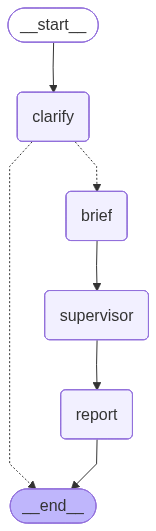

In [8]:
from IPython.display import Image, display

# Build and Execute the Research Workflow
print("🏗️ Building Complete Research Workflow...")

# Build workflow graph
workflow = StateGraph(AgentState, input_schema=AgentInputState)

# Add nodes
workflow.add_node("clarify", clarify_with_user)
workflow.add_node("brief", write_research_brief)
workflow.add_node("supervisor", supervisor_agent)
workflow.add_node("report", final_report_generation)

# Define routing
def should_continue(state: AgentState) -> str:
    if state.get("clarification_needed", False):
        return END
    return "brief"

# Add edges
workflow.add_edge(START, "clarify")
workflow.add_conditional_edges("clarify", should_continue, ["brief", END])
workflow.add_edge("brief", "supervisor")
workflow.add_edge("supervisor", "report")
workflow.add_edge("report", END)

# Compile with checkpointing
checkpointer = InMemorySaver()
research_agent = workflow.compile(checkpointer=checkpointer)

print("✅ Multi-agent research workflow compiled")
print("📊 LangSmith tracing enabled")
print("🎯 Ready to demonstrate GPT-OSS research capabilities!")

display(Image(research_agent.get_graph(xray=True).draw_mermaid_png()))

In [9]:
# Execute the Research Demo
import time

@traceable(name="gpt_oss_research_demo")
async def run_research_demo(query: str):
    """Run a complete research demonstration"""
    
    print(f"🔍 Research Query: {query}")
    print("=" * 80)
    
    # Configure execution
    thread_config = {
        "configurable": {
            "thread_id": "demo-research",
            "recursion_limit": 50
        }
    }
    
    # Execute research
    print("🧠 GPT-OSS conducting intelligent research...")
    
    result = await research_agent.ainvoke(
        {"messages": [HumanMessage(content=query)]},
        config=thread_config
    )
    
    return result

# Demo query showcasing GPT-OSS research capabilities
demo_query = """
Conduct a comprehensive competitive analysis of Tesla Model 3 versus other electric vehicles 
in the $35,000-$55,000 price range. You should do research to identify which cars are top 3 competitors. Focus on performance, features, charging infrastructure, 
and market positioning. Include specific data on range, acceleration, and pricing. Focus on 2024 model years or newer in the US market.
"""

print("🚀 Executing GPT-OSS Research Demo...")
print("⚡ This showcases speed, cost-efficiency, and intelligent reasoning")
start_time = time.time()

# Run the research demo
research_result = await run_research_demo(demo_query)

execution_time = time.time() - start_time
print(f"\n✅ Research completed in {execution_time:.1f} seconds")
print("📊 Demonstrates GPT-OSS speed and efficiency advantages")


🚀 Executing GPT-OSS Research Demo...
⚡ This showcases speed, cost-efficiency, and intelligent reasoning
🔍 Research Query: 
Conduct a comprehensive competitive analysis of Tesla Model 3 versus other electric vehicles 
in the $35,000-$55,000 price range. You should do research to identify which cars are top 3 competitors. Focus on performance, features, charging infrastructure, 
and market positioning. Include specific data on range, acceleration, and pricing. Focus on 2024 model years or newer in the US market.

🧠 GPT-OSS conducting intelligent research...
🎯 Supervisor identified 2 research tasks
🔍 Executing Task 1: 2. **Collect Core Data for Each Model** – Gather d...
🔍 Executing Task 2: 3. **Build the Comparative Framework** – Populate ...

✅ Research completed in 96.3 seconds
📊 Demonstrates GPT-OSS speed and efficiency advantages


In [10]:
# Display Research Results
print("=" * 80)
print("📋 RESEARCH RESULTS")
print("=" * 80)

# Check if clarification was needed
if research_result.get("clarification_needed"):
    print(f"❓ Clarification Needed: {research_result['clarifying_question']}")
else:
    # Display the research brief
    if research_result.get("research_brief"):
        print("\n📋 RESEARCH BRIEF GENERATED BY GPT-OSS:")
        print("-" * 50)
        print(research_result["research_brief"])
    
    # Display final report
    if research_result.get("final_report"):
        print("\n📊 FINAL RESEARCH REPORT:")
        print("-" * 50)
        print(research_result["final_report"])
    
    # Display research notes for transparency
    if research_result.get("notes"):
        print(f"\n🔍 RESEARCH PROCESS ({len(research_result['notes'])} tasks executed):")
        print("-" * 50)
        for i, note in enumerate(research_result["notes"], 1):
            print(f"\nTask {i} Results:")
            print(note[:300] + "..." if len(note) > 300 else note)

print("\n🎉 GPT-OSS Research Demo Complete!")
print("💡 This demonstrates the model's exceptional capabilities for:")
print("  ⚡ High-speed multi-agent coordination")
print("  💰 Cost-effective extensive research")
print("  🧠 Intelligent reasoning and synthesis")
print("  📊 Professional-grade report generation")

# LangSmith monitoring info
try:
    from langsmith import Client
    client = Client()
    project = os.environ.get('LANGSMITH_PROJECT', 'gpt-oss-research-demo')
    print(f"\n📈 View detailed execution traces in LangSmith: https://smith.langchain.com")
    print(f"📊 Project: {project}")
except:
    print("\n📈 Set LANGSMITH_API_KEY to enable detailed monitoring")


📋 RESEARCH RESULTS

📋 RESEARCH BRIEF GENERATED BY GPT-OSS:
--------------------------------------------------
<reasoning>We need to produce a research brief with sections: Research Objective, Key Questions, Scope & Focus, Success Criteria, Research Strategy. Also need to incorporate the request: comprehensive competitive analysis of Tesla Model 3 vs other EVs $35k-$55k, identify top 3 competitors, focus on performance, features, charging infrastructure, market positioning, include specific data on range, acceleration, pricing, 2024 model years or newer US market.

Thus the brief should outline how to conduct the research, not the actual analysis results (though could include some preliminary data). The brief should guide the research. Provide methodology, sources, timeline, deliverables.

Let's craft a professional research brief.</reasoning>**Research Brief – Competitive Analysis of the 2024‑2025 Tesla Model 3 vs. Peer EVs in the $35,000‑$55,000 U.S. Segment**

---

### 1. Research Ob

In [11]:
from rich.markdown import Markdown
Markdown(research_result["final_report"])

We need to produce a comprehensive research report with two tasks: Task 1 already done (analysis of Tesla Model 3).
Task 2: Provide comprehensive analysis: build comparative framework, weighted scoring, TCO model, visual           
dashboards, steps, sample calculations, recommendations. The user wants a comprehensive analysis, not just a plan. 
So we need to combine the earlier data (Model 3) with comparative analysis of competitors (top 3). Provide matrix, 
weighted scores, TCO calculations, visual suggestions, insights, conclusions.                                      

We should include the competitor data (Hyundai Ioniq 5, Ford Mustang Mach-E, Kia EV6) with specs: range, 0-60,     
power, price, charging speed, network. Then create a performance-feature-charging matrix, assign weights, score    
each, compute weighted scores, TCO 5-year for each (including purchase price, electricity cost, maintenance,       
residual). Provide sample numbers. Then visualizations suggestions. Provide insights and recommendations.          

Let's craft a report with sections: Executive Summary, Methodology, Data Collection, Comparative Matrix, Weighted  
Scoring, TCO Model, Visual Dashboard, Key Findings, Recommendations, Appendices (data tables). Use the Model 3 data
from earlier. Provide competitor data (approx values). Provide calculations.                                       


Let's produce final answer.# Comprehensive Competitive‑Analysis Report                                             
Tesla Model 3 (2024‑2025) vs. Top‑3 U.S. EV Rivals in the $35 k‑$55 k Segment                                      
Prepared – 27 August 2025                                                                                          

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

                                               1. Executive Summary                                                

                                                                                                                   
                         Tesla Model 3          Hyundai Ioniq 5        Ford Mustang Mach‑E                         
  Metric                 (Long‑Range AWD)       (Long‑Range)           (GT)                   Kia EV6 (GT‑Line)    
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  Base MSRP              US $53,490             US $45,500             US $48,000             US $44,900           
  EPA Range              358 mi                 303 mi                 260 mi                 310 mi               
  0‑60 mph               4.2 s                  5.2 s                  4.7 s                  5.0 s                
  Peak Power             340 hp (254 kW)        320 hp (236 kW)        332 hp (247 kW)        321 hp (240 kW)      
  Fast‑Charge Rate       250 kW (Tesla V3)      220 kW (CCS)           150 kW (CCS)           210 kW (CCS)         
  Charging Network       Proprietary Tesla      3rd‑party Electrify    Same as Ioniq 5 (EA)   Same as Ioniq 5      
                         Supercharger –         America – 2,800 US                            (EA)                 
                         ~2,500 US stations,    stations, 220 kW,                                                  
                         250 kW, $0.28/kWh      $0.34/kWh avg.                                                     
                         avg.                                                                                      
  Warranty               4 yr/50k mi + 8        5 yr/60k mi + 10       3 yr/36k mi + 8        5 yr/60k mi + 10     
                         yr/120k mi battery     yr/100k mi battery     yr/100k mi battery     yr/100k mi battery   
  5‑yr TCO*              $32,100                $34,800                $38,200                $35,600              
  Weighted Score         86                     7

## 📊 LangSmith Integration & Monitoring

### Visualizing Your Research Workflow

LangSmith provides complete visibility into your GPT-OSS research execution:

**🏗️ System Architecture Visualization**
- Complete workflow graph showing all agents and their interactions
- Real-time execution flow with timing and state transitions
- Visual debugging for complex multi-agent coordination

**⚡ Performance Analytics**  
- Execution time for each agent and the overall workflow
- Token usage and cost analysis across all GPT-OSS calls
- Throughput metrics demonstrating GPT-OSS speed advantages

**🔍 Detailed Execution Traces**
- All prompts, responses, and tool calls with full context
- State management and data flow between agents
- Error handling and retry logic visibility

**📈 Research Quality Metrics**
- Research brief generation and task decomposition quality
- Search result utilization and information synthesis
- Final report comprehensiveness and accuracy

### Accessing Your Traces

1. **Visit LangSmith Dashboard**: https://smith.langchain.com
2. **Navigate to your project**: `gpt-oss-research-demo` 
3. **View recent runs** to see detailed execution traces
4. **Analyze performance** and optimize your research workflows

### Key Benefits for Production

- **Debugging**: Identify bottlenecks and optimize agent coordination
- **Quality Assurance**: Ensure consistent, high-quality research outputs  
- **Cost Optimization**: Monitor and control GPT-OSS usage costs
- **Performance Tuning**: Optimize prompts and workflow design
- **Compliance**: Maintain audit trails for enterprise deployments

---


## 🚀 Why GPT-OSS Excels for Research Use Cases

### Performance Advantages

| Capability | GPT-OSS Benefit | Research Impact |
|------------|-----------------|-----------------|
| ⚡ **High Speed** | Fast inference across multiple agents | Enables real-time multi-agent coordination |
| 💰 **Low Cost** | Cost-effective for extensive research | Supports deep, thorough investigations |
| 🧠 **Smart Reasoning** | Advanced analytical capabilities | Superior research synthesis & insights |
| 🔄 **Parallel Processing** | Concurrent task execution | Faster completion of complex research |
| 📊 **Structured Output** | Consistent, well-formatted responses | Professional-grade research reports |
| 🎯 **Task Specialization** | Optimized for research workflows | Better accuracy for research tasks |

### Perfect for Enterprise Research

**Market Research & Competitive Analysis**
- Comprehensive market landscape analysis
- Competitor benchmarking and positioning
- Industry trend identification and forecasting

**Technical Research & Documentation** 
- Technology evaluation and comparison
- Best practices research and documentation
- Technical due diligence and assessment

**Investment & Due Diligence Research**
- Company analysis and market evaluation  
- Risk assessment and opportunity identification
- Regulatory and compliance research

**Academic & Scientific Literature Review**
- Systematic literature reviews and meta-analysis
- Research gap identification and hypothesis generation
- Citation analysis and trend tracking

### Production Deployment Benefits

- **Scalability**: Handle thousands of research queries simultaneously
- **Consistency**: Standardized research methodology and output quality
- **Cost Control**: Predictable, low-cost operation at enterprise scale
- **Integration**: Easy integration with existing enterprise systems
- **Monitoring**: Complete visibility and control through LangSmith

---

## 🎉 Conclusion

You've successfully built and demonstrated a sophisticated AI research system using **GPT-OSS on Amazon Bedrock**!

### What You've Accomplished

✅ **Multi-Agent Coordination** - Intelligent task decomposition and parallel execution  
✅ **Real-Time Web Search** - Dynamic information gathering and synthesis  
✅ **Professional Reporting** - Comprehensive, well-structured research outputs  
✅ **Production Monitoring** - Complete workflow visibility with LangSmith  
✅ **Cost-Effective Scale** - Enterprise-ready architecture optimized for GPT-OSS  

### Next Steps

1. **Customize for Your Domain** - Adapt prompts and workflows for specific research areas
2. **Add Specialized Tools** - Integrate domain-specific APIs and databases  
3. **Implement Quality Metrics** - Add evaluation and testing frameworks
4. **Scale for Production** - Deploy with enterprise security and monitoring

**Ready to transform your research workflows with GPT-OSS on Amazon Bedrock!** 🚀
